<h1 align="center"> Virginia City Clustering with data science job posts and venues </h1>

## Table of Contents 

1. <a href="#section1">Libraries and Dataset Importing</a>
2. <a href="#section2">Data Pre-processing</a>  
3. <a href="#section3">Clustering and cluster comparing</a>  
4. <a href="#section4">Data Visualization</a>  
5. <a href="#section5">Cluter Evaluation</a>

<h2><a id="section1">1. Libraries and Dataset Importing</a></h2>

In [38]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import matplotlib as mpl

The job post data set is downloaded from https://www.kaggle.com/jobspikr/data-scientist-job-postings-from-the-usa/data
The VA indepenent city is scraped from https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia

In [2]:
us_jobs = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')
indi_city = pd.read_csv('VA_indi_city.csv')
us_jobs.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [3]:
va_jobs = us_jobs[us_jobs['inferred_state'] == 'Virginia'].reset_index().drop('index', axis=1)
va_jobs.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 06:24:28 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,"Envoy Consulting Group, Inc",Reston,VA,Usa,Reston,Virginia,...,Data Scientist EnvoyIT is looking for a Data S...,Full Time,NaN,dice,usa,1549436430079148,NaN,NaN,eda91b88eb3096ed98bc1a5f6b5568df,NaN
1,2019-02-06 06:21:12 +0000,https://www.indeed.com/viewjob?jk=27a8eb5fa40b...,ETL Developer / Data Scientist,Computer/Internet,Noblis,Reston,VA 20191,Usa,Reston,Virginia,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436430119850,NaN,NaN,53224da901548e7137bbb163d456ba6a,NaN
2,2019-02-06 06:38:53 +0000,https://www.dice.com/jobs/detail/Senior-Data-S...,Senior Data Scientist :: VK (9),NaN,"Pyramid Consulting, Inc.",Mclean,VA,Usa,Mclean,Virginia,...,Immediate need for Senior Data Scientist with ...,Undefined,NaN,dice,usa,1549436430692033,NaN,NaN,db8d5a77e8107823b26d628fbcfff234,NaN
3,2019-02-06 06:39:01 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Apeiro Technologies,Mclean,VA,Usa,Mclean,Virginia,...,"Hi, Hope you are doing great. We are having re...",Contract,NaN,dice,usa,1549436430891443,NaN,NaN,50ad7745f8bbce74e326ca32dba69b9c,NaN
4,2019-02-06 07:40:06 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist,military,L3 Technologies,Chantilly,VA,Usa,Chantilly,Virginia,...,Data Scientist - Requisition ID ...,Undefined,NaN,monster,usa,1549440024629624,NaN,NaN,8d220fbda8e4ab36f10bba4ec8ff20ad,NaN


This list is later used in filtering geolocator requests.

In [4]:
city_list = indi_city['Independent city'].tolist()

<h2><a id="section2"> 2.  Data Pre-processing </a></h2>

### Check missing values 

In [5]:
va_jobs = va_jobs[['inferred_city', 'inferred_state']]
print(va_jobs['inferred_city'].isnull().value_counts())
print(va_jobs['inferred_state'].isnull().value_counts())

False    625
True      40
Name: inferred_city, dtype: int64
False    665
Name: inferred_state, dtype: int64


Drop rows with missing valuse since the number is small.

In [6]:
va_jobs=va_jobs.dropna()
va_jobs.shape

(625, 2)

### Obtain a list of counties according to the cities.

In [7]:
counties = []
geolocator = Nominatim(user_agent="VA_county")

#loop through the dataframe
for city in va_jobs['inferred_city']:
    
    #if the city is an independent city, set county name = city name and only append coordinates
    if city in city_list:
        counties.append(city)
        try:
            address, (latitude, longitude) = geolocator.geocode("{},VA".format(city))
        except:
            counties.append('')
    else:
        try:
            #get the full imformation inlcuding county name, latitude and longitude
            address, (latitude, longitude) = geolocator.geocode("{},VA".format(city))
            county = [x for x in address.split(',') if 'County' in x][0].strip()
            counties.append(county)
        except:
            counties.append('')

In [8]:
va_jobs['county'] = counties
va_jobs.rename(columns={'inferred_city':'city', 'inferred_state':'state'}, inplace=True)
va_jobs.head()

,city,state,county
0,Reston,Virginia,Fairfax County
1,Reston,Virginia,Fairfax County
2,Mclean,Virginia,Fairfax County
3,Mclean,Virginia,Fairfax County
4,Chantilly,Virginia,Fairfax County


Check missing value again

In [9]:
print(va_jobs['county'].isnull().value_counts())

False    625
Name: county, dtype: int64


### Create new dataframes for choropleth map plotting 

In [10]:
county_counts = va_jobs['county'].value_counts().to_frame()

In [11]:
county_counts = county_counts.reset_index()

In [12]:
county_counts.rename(columns={'index':'County','county':'Count'}, inplace=True)
new_name=[]

#remove word county so the dataframe works with geojson labels
for county in county_counts['County']:
    county = county.replace(' County', '').strip()
    new_name.append(county)
county_counts['County'] = new_name

#change fairfax to fairfax city to avoid confusion with fairfax county
county_counts.loc[3,'County'] = 'Fairfax City'
county_counts.head()

,County,Count
0,Fairfax,271
1,Arlington,127
2,Alexandria,59
3,Fairfax City,47
4,Richmond,28


Explor the dataframe

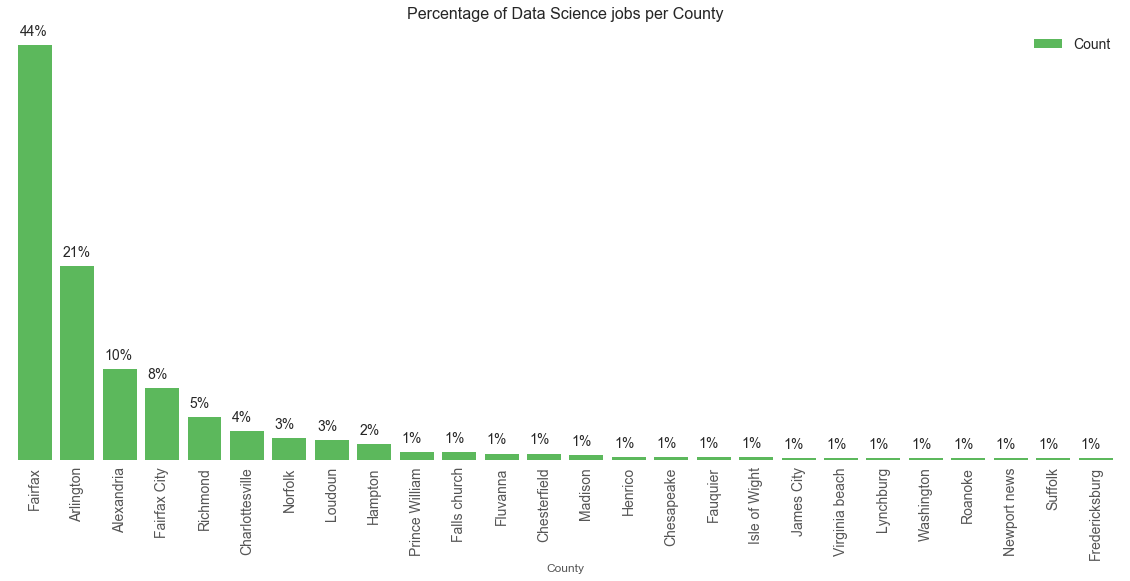

In [13]:
#create the DataFrame to plot
county_plot = county_counts.sort_values('Count', ascending=False).set_index('County')
county_plot['Count'].astype('float')
#create colors for each category to plot
colors = ['#5cb85c']

#create an instance at artist layer and a bar plot with data converted to decimal using DataFrame.div(#,axis) function
ax=county_plot.div(625, axis=0).plot(kind='bar',figsize=(20,8),width=0.8,color=colors)

#remove the default gray background color from figure and legend, set xlabel, legend fontsize=14
ax.set_facecolor('w')
plt.legend(fontsize=14,facecolor='w')
plt.xticks(fontsize=14)

#remove ylabels
plt.yticks([])
#add title and set fontsize=16
plt.title("Percentage of Data Science jobs per County", fontsize=16)
#add annotations
for p in ax.patches:
    width,height=p.get_width(), p.get_height()
    x,y=p.get_xy()
    # height+0.005 to avoid round off to 0%
    ax.annotate('{:.0%}'.format(height+0.005),(x+0.05,y+height+0.01), fontsize=14)

This dataframe will be used to combine venue categories and the combined dataframe will be used for clustering

In [14]:
city_counts = va_jobs['city'].value_counts().reset_index()
city_counts.rename(columns={'index':'city','city':'data_science_job'}, inplace=True)

In [15]:
city_counts.head()

,city,data_science_job
0,Arlington,123
1,Mclean,96
2,Reston,61
3,Alexandria,59
4,Fairfax,47


Get corresponding latitudes and longitudes for each city

In [16]:
lat=[]
lng=[]
for city in city_counts['city']:
    try:
        address, (latitude, longitude) = geolocator.geocode("{},VA".format(city))
        lat.append(latitude)
        lng.append(longitude)
    except:
        lat.append('')
        lng.append('')

In [17]:
city_counts['latitude'] = lat
city_counts['longitude'] = lng
city_counts = city_counts[['city','latitude','longitude','data_science_job']]
city_counts = city_counts.dropna()

Check missing values again and display the dataframe

In [18]:
print(city_counts['latitude'].isnull().value_counts())
print(city_counts['longitude'].isnull().value_counts())
city_counts.head()

False    45
Name: latitude, dtype: int64
False    45
Name: longitude, dtype: int64


,city,latitude,longitude,data_science_job
0,Arlington,38.890396,-77.084159,123
1,Mclean,38.934289,-77.177633,96
2,Reston,38.958402,-77.357974,61
3,Alexandria,38.805110,-77.047023,59
4,Fairfax,38.846224,-77.306373,47


### Query using Foursquare API 

Create API credential variables

In [19]:
CLIENT_ID = 'Foursquare ID' # Foursquare ID
CLIENT_SECRET = 'Foursquare Secret' # Foursquare Secret
VERSION = 'date' # format YYYYMMDD
LIMIT = 100 #Search the first 100 commen veneus

Create a function to query via Foursqure API and return the result dataframe

In [20]:
def get_venues(names, latitudes, longitudes, jobs, radius=500):
    venues_list=[]
    for name, lat, lon, job in zip(names, latitudes, longitudes, jobs):
        #generate the link for the api call
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lon,
            radius,
            LIMIT)
        
        #get the json file from each call
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #process the json file to get the needed information
        #append no venue and no category if the query does not returen anything(possible for remote locations)
        if not results:
            venues_list.append([(
                    name,
                    lat,
                    lon,
                    job,
                    'No Venue',  
                    'No Category')])
        else:
            venues_list.append([(
                    name,
                    lat,
                    lon,
                    job,
                    v['venue']['name'],  
                    v['venue']['categories'][0]['name']) for v in results])
    
    #use imbeded loops to write all information to the dataframe
    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Data Science Job',
                  'Venue',  
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
#call the function
cities_venue = get_venues(names=city_counts['city'],
                            latitudes=city_counts['latitude'],
                            longitudes=city_counts['longitude'],
                            jobs=city_counts['data_science_job'])

Verify that there are cities without any venue information for Foursquare API

In [22]:
cities_venue.query('Venue == "No Venue"')

,City,Latitude,Longitude,Data Science Job,Venue,Venue Category
655,Columbia,37.752921,-78.162501,4,No Venue,No Category
726,Madison,38.411462,-78.284663,3,No Venue,No Category
1248,Washington,36.740236,-81.942167,1,No Venue,No Category


In [23]:
cities_venue.head()

,City,Latitude,Longitude,Data Science Job,Venue,Venue Category
0,Arlington,38.890396,-77.084159,123,AMC Courthouse Plaza 8,Movie Theater
1,Arlington,38.890396,-77.084159,123,"Bayou Bakery, Coffee Bar & Eatery",Cajun / Creole Restaurant
2,Arlington,38.890396,-77.084159,123,Arlington Farmers Market,Farmers Market
3,Arlington,38.890396,-77.084159,123,The Brew Shop,Beer Store
4,Arlington,38.890396,-77.084159,123,Sawatdee,Thai Restaurant


Use onehot encoding to convert categorical variables(Venue Category) to numerical variables

In [24]:
city_venue_onehot = pd.get_dummies(cities_venue[['Venue Category']], prefix="", prefix_sep="")

#insert city column to the new dataframe and move the new collumn to the front using list comprehension
city_venue_onehot['City'] = cities_venue['City'] 
city_venue_onehot = city_venue_onehot[['City']+[col for col in city_venue_onehot.columns if col != 'City']]

### Create the dataframe for clustering 

Each city is a vector so groupby city with sum of number of venue categories

In [25]:
city_venue_grouped = city_venue_onehot.groupby('City').sum()

#drop the previously added 'No Category' column
city_venue_grouped = city_venue_grouped.drop(columns=['No Category'])

#sort the dataframe by city
city_venue_grouped = city_venue_grouped.sort_values(by='City')

In [26]:
#sort the dataframe by city so the roll sequence is the same as city-venue_grouped
city_counts = city_counts.sort_values(by='city')

#Insert latitude and longitude to the new dataframe
city_venue_grouped['Latitude'] = city_counts['latitude'].values
city_venue_grouped['Longitude'] = city_counts['longitude'].values

#move the new columns to the front of the dataframe by using list comprehension
city_venue_grouped = city_venue_grouped[['Longitude']+[col for col in city_venue_grouped.columns if col != 'Longitude']]
city_venue_grouped = city_venue_grouped[['Latitude']+[col for col in city_venue_grouped.columns if col != 'Latitude']]

#reset the index so the city column will be the front most column
city_venue_grouped.reset_index(inplace=True)

In [27]:
city_venue_grouped.head()

,City,Latitude,Longitude,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,...,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alexandria,38.805110,-77.047023,0,5,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,2
1,Annandale,38.830310,-77.196497,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,Arlington,38.890396,-77.084159,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
3,Ashburn,39.043719,-77.487490,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Belvoir,38.859558,-77.820272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalize the dataframe 

Although sklearn supports data normalization via preprocessing library, it only takes numpy arrays and passing dataframe to it will loose column names. So I applied z-score normalization directly on the dataframe: 

In [28]:
city_venue_normal = pd.DataFrame()
for col in city_venue_grouped.columns[3:]:
    city_venue_normal[col] = (city_venue_grouped[col] - city_venue_grouped[col].mean())/city_venue_grouped[col].std()

In [29]:
city_venue_normal.head()

,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,-0.213256,2.894987,4.585000,-0.213256,-0.213256,3.699850,-0.149071,3.699850,1.255306,-0.308857,...,-0.149071,-0.264275,-0.308857,1.359636,-0.149071,2.796824,-0.366854,-0.149071,0.725745,3.886250
1,-0.213256,-0.723747,-0.213256,-0.213256,-0.213256,-0.264275,-0.149071,3.699850,5.714947,-0.308857,...,-0.149071,-0.264275,-0.308857,3.213686,-0.149071,-0.349603,-0.366854,-0.149071,-0.327756,-0.327756
2,-0.213256,-0.723747,-0.213256,-0.213256,-0.213256,-0.264275,-0.149071,-0.264275,-0.231241,-0.308857,...,-0.149071,-0.264275,-0.308857,1.359636,-0.149071,2.796824,-0.366854,-0.149071,-0.327756,3.886250
3,-0.213256,-0.723747,-0.213256,-0.213256,-0.213256,-0.264275,-0.149071,-0.264275,-0.231241,-0.308857,...,-0.149071,-0.264275,-0.308857,-0.494413,-0.149071,-0.349603,1.991493,-0.149071,-0.327756,-0.327756
4,-0.213256,-0.723747,-0.213256,-0.213256,-0.213256,-0.264275,-0.149071,-0.264275,-0.231241,-0.308857,...,-0.149071,-0.264275,-0.308857,-0.494413,-0.149071,-0.349603,-0.366854,-0.149071,-0.327756,-0.327756


<h2><a id="section3">3. Clustering and cluster comparing</a></h2>

I use K-means to cluster the dataframe. To select the best K value, I use kelbow_visualizer from yellowbrick to identify the elbowpoint. 

C:\Users\Owner\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Owner\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


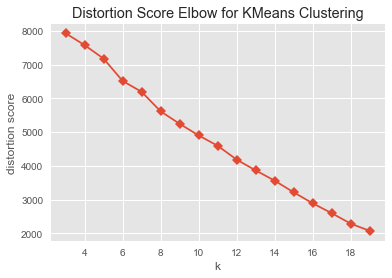

In [30]:
#create a model instance from sklearn KMeans
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(3,20), timings=False)

visualizer.fit(city_venue_normal)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [31]:
sil = []
kmax = 20

for k in range(3,kmax+1):
    model_2 = KMeans(n_clusters = k, random_state=1).fit(city_venue_normal)
    labels = model_2.labels_
    sil.append(silhouette_score(city_venue_normal, labels, metric = 'euclidean'))

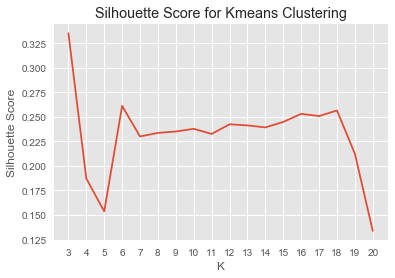

In [32]:
#shift the graph by 3 units by adding a vector
plt.plot(range(3,3+len(sil)),sil)
plt.title('Silhouette Score for Kmeans Clustering')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(3,21,1))
plt.show()

It seems like 11 is the best value. However, after choosing 11, I found most of the clusters are signle data point clusters. So I decided with k=4 since it can be seen as an elbow point before 5.

In [33]:
k = 3
kmeans = KMeans(n_clusters = k, random_state=1).fit(city_venue_normal)
kmeans.labels_[0:20]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Insert Cluster Lable to the dataframe for plotting

In [34]:
city_venue_grouped.insert(1,'Cluster Label', kmeans.labels_)

In [35]:
city_venue_grouped.head()

,City,Cluster Label,Latitude,Longitude,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alexandria,2,38.805110,-77.047023,0,5,1,0,0,1,...,0,0,0,1,0,1,0,0,1,2
1,Annandale,0,38.830310,-77.196497,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,Arlington,0,38.890396,-77.084159,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
3,Ashburn,0,39.043719,-77.487490,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Belvoir,0,38.859558,-77.820272,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2><a id='section4'> 4. Data Visualization </a></h2> 

I choose to use folium for data visualization

In [36]:
address, (latitude, longitude) = geolocator.geocode("Virginia")

In [39]:
#similar settings as the first map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)
va_geo = r'va_counties.geojson'

#create colors for each cluster
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#first create a choropleth map
map_clusters.choropleth(
    geo_data=va_geo,
    data=county_counts,
    columns=['County', 'Count'],
    key_on='feature.properties.NAME',
    
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.2,
    #not all counties have data science jobs so fill not listed ones with grey color
    nan_fill_color = '#grey',
    nan_fill_opacity=0.1,
    threshold_scale = [1,9,15,40,80,120,160,200,240,280])
#create the plot
for lat, lon, poi, cluster in zip(city_venue_grouped['Latitude'], city_venue_grouped['Longitude'],
                                 city_venue_grouped['City'], city_venue_grouped['Cluster Label']):
    label = folium.Popup(str(poi) + '\n' + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

C:\Users\Owner\Anaconda\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [40]:
map_clusters

<h2><a id='section5'> 5. Cluster Evaluation </a></h2> 

Define a function that sorts venues in decending order

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new dataframe showing the top ten venues for evaluations

In [42]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
city_venue_grouped = city_venue_grouped.drop(columns=['Latitude','Longitude','Cluster Label'])

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_venues_sorted = pd.DataFrame(columns=columns)
top_venues_sorted['City'] = city_venue_grouped['City']

for ind in np.arange(city_venue_grouped.shape[0]):
    top_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_venue_grouped.iloc[ind, :], num_top_venues)
    
# add labels and reorder columns
top_venues_sorted.insert(1,'Cluster Label', kmeans.labels_)
top_venues_sorted = top_venues_sorted[['Cluster Label']+[col for col in top_venues_sorted.columns if col != 'Cluster Label']]
top_venues_sorted = top_venues_sorted[['City']+[col for col in top_venues_sorted.columns if col != 'City']]
top_venues_sorted.head()

,City,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,2,American Restaurant,Spa,Coffee Shop,Boutique,French Restaurant,Clothing Store,Yoga Studio,Restaurant,Café,Cajun / Creole Restaurant
1,Annandale,0,Korean Restaurant,Asian Restaurant,Pharmacy,Pizza Place,Karaoke Bar,Vietnamese Restaurant,Grocery Store,Seafood Restaurant,Bubble Tea Shop,Latin American Restaurant
2,Arlington,0,Bar,Hotel,Food Truck,Yoga Studio,Donut Shop,Middle Eastern Restaurant,Deli / Bodega,Pizza Place,Health & Beauty Service,Sandwich Place
3,Ashburn,0,Sporting Goods Shop,Vape Store,Deli / Bodega,Performing Arts Venue,Park,Food Truck,BBQ Joint,Trail,Convenience Store,Wine Shop
4,Belvoir,0,Pet Store,Yoga Studio,Drugstore,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop


In [43]:
top_venues_sorted[top_venues_sorted['Cluster Label'] == 0]

,City,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Annandale,0,Korean Restaurant,Asian Restaurant,Pharmacy,Pizza Place,Karaoke Bar,Vietnamese Restaurant,Grocery Store,Seafood Restaurant,Bubble Tea Shop,Latin American Restaurant
2,Arlington,0,Bar,Hotel,Food Truck,Yoga Studio,Donut Shop,Middle Eastern Restaurant,Deli / Bodega,Pizza Place,Health & Beauty Service,Sandwich Place
3,Ashburn,0,Sporting Goods Shop,Vape Store,Deli / Bodega,Performing Arts Venue,Park,Food Truck,BBQ Joint,Trail,Convenience Store,Wine Shop
4,Belvoir,0,Pet Store,Yoga Studio,Drugstore,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop
5,Centreville,0,Korean Restaurant,Pharmacy,Bakery,Pizza Place,Spa,Bubble Tea Shop,Supermarket,Convenience Store,Fried Chicken Joint,Breakfast Spot
6,Chantilly,0,American Restaurant,Bank,Vietnamese Restaurant,Supermarket,Pizza Place,Indian Restaurant,Convenience Store,Chinese Restaurant,Korean Restaurant,Supplement Shop
7,Charlottesville,0,Music Venue,French Restaurant,Burger Joint,Café,Tea Room,Restaurant,Gas Station,Sports Bar,Furniture / Home Store,Pie Shop
8,Chesapeake,0,Planetarium,Farmers Market,Locksmith,Yoga Studio,Drugstore,Food Truck,Food Court,Food & Drink Shop,Food,Fondue Restaurant
9,Chester,0,Ice Cream Shop,BBQ Joint,Pizza Place,Pharmacy,Restaurant,Drugstore,Bookstore,Mexican Restaurant,Convenience Store,American Restaurant
10,Chesterfield,0,Racecourse,Lake,Campground,Yoga Studio,Donut Shop,Food Truck,Food Court,Food & Drink Shop,Food,Fondue Restaurant


###  Evaluate Cluster 0 to find the most common venues

In [44]:
cluster_1 = pd.DataFrame()
for i in range(2,12):
    cluster_1[i-1] = top_venues_sorted[top_venues_sorted['Cluster Label'] == 0].iloc[:,i].value_counts()
cluster_1.fillna(0,inplace=True)
cluster_1.astype('int32')
cluster_1['Total'] = cluster_1.sum(axis=1)
cluster_1 = cluster_1.sort_values('Total', ascending=False)

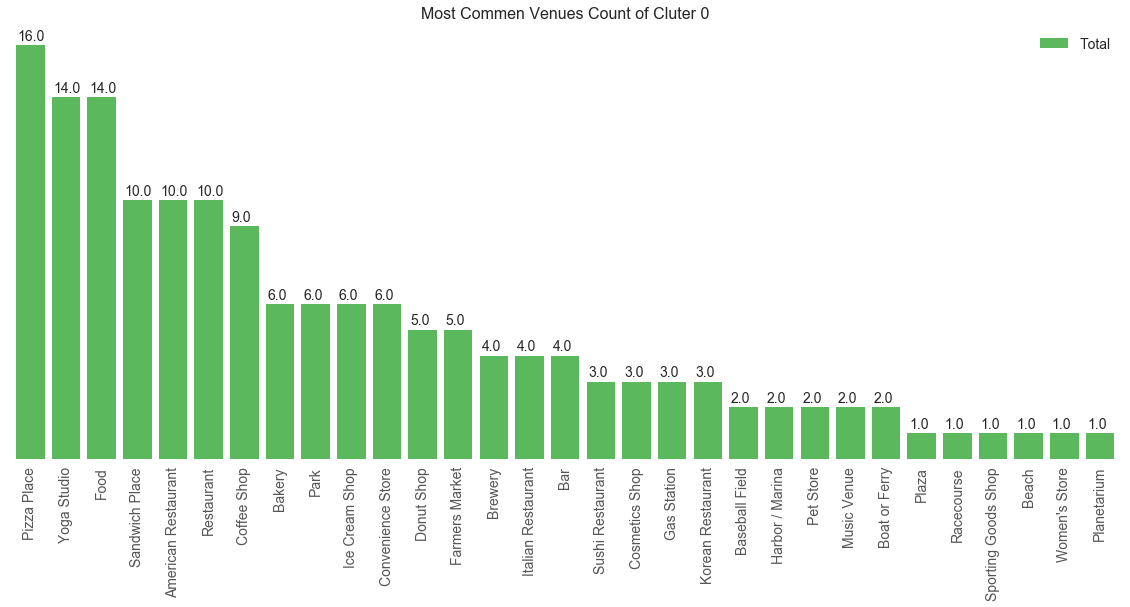

In [49]:
#create colors for each category to plot
colors = '#5cb85c'

#create an instance at artist layer and a bar plot with data converted to decimal using DataFrame.div(#,axis) function
ax=cluster_1['Total'].plot(kind='bar',figsize=(20,8),width=0.8,color=colors)

#remove the default gray background color from figure and legend, set xlabel, legend fontsize=14
ax.set_facecolor('w')
plt.legend(fontsize=14,facecolor='w')
plt.xticks(fontsize=14)
#remove ylabels
plt.yticks([])
#add title and set fontsize=16
plt.title("Most Commen Venues Count of Cluter 0", fontsize=16)
#add annotations
for p in ax.patches:
    width,height=p.get_width(), p.get_height()
    x,y=p.get_xy()
    ax.annotate('{}'.format(height),(x+0.05,y+height+0.2), fontsize=14)

###  Evaluate Cluster 1 and 2 to find the most common venues

In [46]:
top_venues_sorted[(top_venues_sorted['Cluster Label'] == 1)|(top_venues_sorted['Cluster Label'] == 2)]

,City,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,2,American Restaurant,Spa,Coffee Shop,Boutique,French Restaurant,Clothing Store,Yoga Studio,Restaurant,Café,Cajun / Creole Restaurant
38,Tysons,1,Clothing Store,Coffee Shop,Women's Store,American Restaurant,Furniture / Home Store,Mobile Phone Shop,Bubble Tea Shop,Toy / Game Store,Italian Restaurant,Boutique
39,Tysons corner,1,Clothing Store,Coffee Shop,Women's Store,American Restaurant,Furniture / Home Store,Mobile Phone Shop,Bubble Tea Shop,Toy / Game Store,Italian Restaurant,Boutique
